In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,id,name,rating,review,total_review
0,0,0,LjVlsV9tKGnv7e4Iyt9c5Q,Lark,4.0,The Lark is a cocktail bar lounge and restaura...,319
1,1,1,LjVlsV9tKGnv7e4Iyt9c5Q,Lark,4.0,Lark has been under renovation a little bit ag...,319
2,2,2,LjVlsV9tKGnv7e4Iyt9c5Q,Lark,4.0,In search of a late dinner following our kiddo...,319
3,3,3,LjVlsV9tKGnv7e4Iyt9c5Q,Lark,4.0,Tried Lark once before when it was more of a s...,319
4,4,4,LjVlsV9tKGnv7e4Iyt9c5Q,Lark,4.0,"a great, cozy and secluded place in the midst ...",319


In [3]:
df = df.drop(labels = ['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [4]:
df.shape

(81002, 5)

In [5]:
df.describe()

,rating,total_review
count,81002.000000,81002.000000
mean,4.191131,825.219846
std,0.319361,1130.265301
min,2.500000,1.000000
25%,4.000000,186.000000
50%,4.000000,463.000000
75%,4.500000,1084.000000
max,5.000000,11926.000000


In [6]:
df.isna().sum()

id              0
name            0
rating          0
review          0
total_review    0
dtype: int64

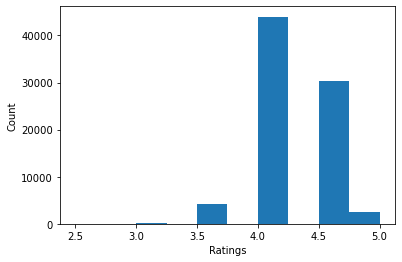

In [7]:
fig, ax = plt.subplots()
ax.hist(df['rating'])
ax.set_xlabel('Ratings')
ax.set_ylabel('Count')
plt.show()

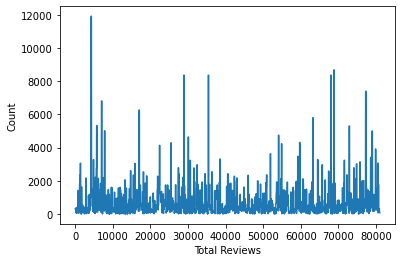

In [8]:
fig, ax = plt.subplots()
ax.plot(df.total_review)
ax.set_xlabel('Total Reviews')
ax.set_ylabel('Count')
plt.show()

In [9]:
len(df['name'].unique())

771

In [10]:
lark_df = df[df['name'] == 'Lark']

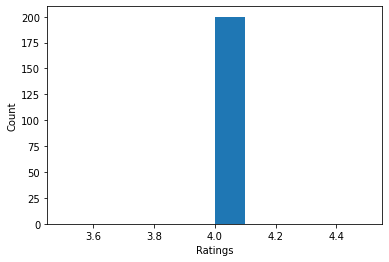

In [11]:
fig, ax = plt.subplots()
ax.hist(lark_df['rating'])
ax.set_xlabel('Ratings')
ax.set_ylabel('Count')
plt.show()

In [12]:
unique_rest = df.groupby('id').first()

In [13]:
review_text = df['review']

In [14]:
df.groupby('id').review.apply(' '.join)

id
-4wz0dOG3RdBNYE02l9KjA    The salt and pepper Crab is soooooo freaking d...
-BKIqDQ3CawzwyN9kW1-FQ    A solid Thai spot on Divisadero! I've come her...
-Lw7AT_wBUMbeTpAf21aPw    1 piece of nigiri per order was a delightful s...
-U6yVoToT7zfOqRWzwwuPw    Stopped in quickly looking for a bite while ex...
-Wei8JiA-RBzuSnO_9X0FQ    A serious hole in the wall and a great idea. S...
                                                ...                        
zgKjDEr5-PA8ZDN1Xpbagg    I like this place a lot and I'm glad there's a...
ziWibyZYvqtrbc7f9v2iPg    Great food, nominal fare. Tons of options. The...
zj09K037XrZ_51Yh5qsIAw    The okonomiyaki was delicious. Wide variety of...
zkVm2lMNdKWfbE4Uo1tMeA    I'm happy to finally be writing about Abrazo! ...
zsrBtX1mIzjEbIxiL6TTtQ    I was looking for a spot in the city to host m...
Name: review, Length: 787, dtype: object

In [15]:
dungeoness_reviews = df.groupby('id').review.apply(' '.join)[0]

In [16]:
dungeoness_filtered = []
stop_words = set(stopwords.words('english'))
stop_words.add('n\'t')
word_tokens = word_tokenize(dungeoness_reviews)

for w in word_tokens:
    if w.lower() not in stop_words:
        dungeoness_filtered.append(w)
dungeoness_filtered = ' '.join(dungeoness_filtered)
dungeoness_filtered = re.sub('[^a-zA-Z0-9 \n\.]', '', dungeoness_filtered)
dungeoness_filtered = dungeoness_filtered.replace('.', '')

In [17]:
def make_word_cloud(string):
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(string)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

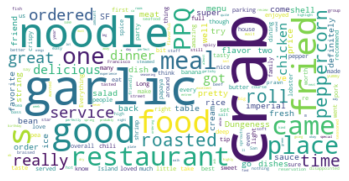

In [18]:
make_word_cloud(dungeoness_filtered)

In [19]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [20]:
sorted(word_count(dungeoness_filtered).items(), key=lambda x:x[1], reverse=True)[0:10]

[('crab', 217),
 ('garlic', 123),
 ('noodles', 89),
 ('good', 72),
 ('s', 64),
 ('fried', 64),
 ('food', 50),
 ('came', 44),
 ('PPQ', 43),
 ('place', 42)]